In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy.table import Table
import astropy.io.fits as fits

from scipy.optimize import curve_fit

from glob import glob

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

from astropy.stats import LombScargle
from stuff import FINDflare

In [5]:
# tess_dir = '/data/epyc/data/tess/'
tess_dir = '/Users/james/Desktop/tess/'

sectors = ['sector001', 'sector002']

# just in case glob wants to re-order things, be sure grab them in Sector order
sect1 = glob(tess_dir + sectors[0] + '/*.fits', recursive=True)
sect2 = glob(tess_dir + sectors[1] + '/*.fits', recursive=True)

files = sect1 + sect2
print(len(sect1), len(sect2), len(files))

15889 15990 31879


In [8]:
ALL_TIC = pd.Series(files).str.split('-', expand=True).iloc[:,-3].astype('int')

df1 = pd.read_csv(tess_dir + 'gaiatess1_xmatch_1arsec-result.csv')
df2 = pd.read_csv(tess_dir + 'gaiatess2_xmatch_1arsec-result.csv')

In [9]:
# df1.columns.values

(12813,)


(15, -5)

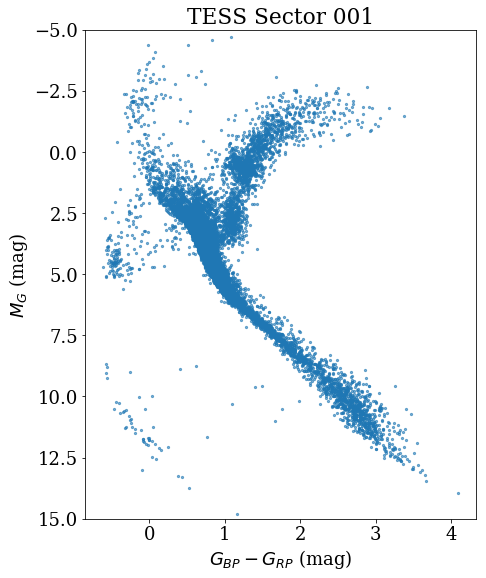

In [10]:
ok1 = np.where(np.isfinite(df1[u'parallax']) & # this is basically the same as the TGAS file...
              (df1[u'parallax_error'] < 0.1) &
              (df1[u'modality_flag'] == 1) & 
              (df1[u'result_flag'] == 1) &
              np.isfinite(df1[u'bp_rp']) & 
              (df1[u'phot_bp_mean_flux_error']/df1[u'phot_bp_mean_flux'] < 0.01) & 
              (df1[u'phot_rp_mean_flux_error']/df1[u'phot_rp_mean_flux'] < 0.01) & 
              (df1[u'phot_g_mean_flux_error']/df1[u'phot_g_mean_flux'] < 0.01))[0]
print(ok1.shape)

plt.figure(figsize=(7,9))
plt.scatter(df1['bp_rp'][ok1], df1['phot_g_mean_mag'][ok1] - 5. * np.log10(df1[u'r_est'].values[ok1])  + 5, 
            alpha=0.6, s=5)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('TESS Sector 001')
plt.ylim(15,-5)

(12969,)


(15, -5)

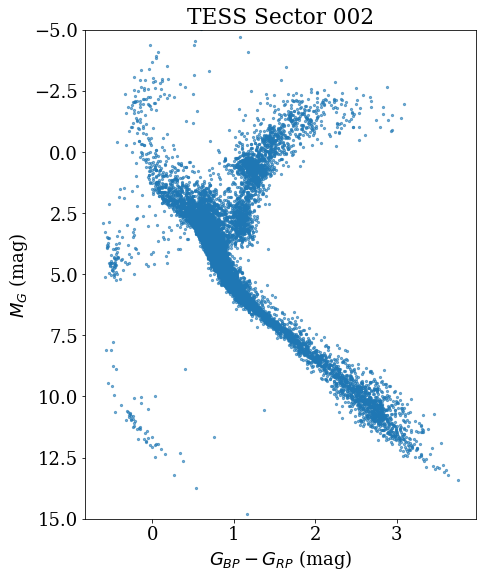

In [11]:
ok2 = np.where(np.isfinite(df2[u'parallax']) & # this is basically the same as the TGAS file...
              (df2[u'parallax_error'] < 0.1) &
              (df2[u'modality_flag'] == 1) & 
              (df2[u'result_flag'] == 1) &
              np.isfinite(df2[u'bp_rp']) & 
              (df2[u'phot_bp_mean_flux_error']/df2[u'phot_bp_mean_flux'] < 0.01) & 
              (df2[u'phot_rp_mean_flux_error']/df2[u'phot_rp_mean_flux'] < 0.01) & 
              (df2[u'phot_g_mean_flux_error']/df2[u'phot_g_mean_flux'] < 0.01))[0]
print(ok2.shape)

plt.figure(figsize=(7,9))
plt.scatter(df2['bp_rp'][ok2], df2['phot_g_mean_mag'][ok2] - 5. * np.log10(df2[u'r_est'].values[ok2])  + 5, 
            alpha=0.6, s=5)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('TESS Sector 002')
plt.ylim(15,-5)

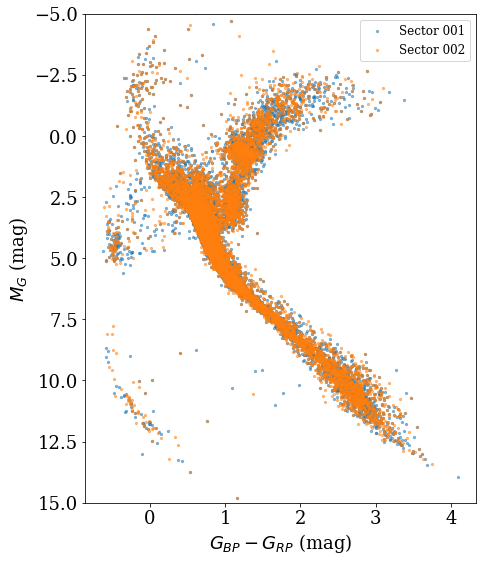

In [12]:
plt.figure(figsize=(7,9))

plt.scatter(df1['bp_rp'][ok1], df1['phot_g_mean_mag'][ok1] - 5. * np.log10(df1[u'r_est'].values[ok1])  + 5, 
            alpha=0.5, s=5, label='Sector 001')
plt.scatter(df2['bp_rp'][ok2], df2['phot_g_mean_mag'][ok2] - 5. * np.log10(df2[u'r_est'].values[ok2])  + 5, 
            alpha=0.5, s=5, label='Sector 002')

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.ylim(15,-5)
plt.legend(fontsize=12)

Text(0, 0.5, 'Dec')

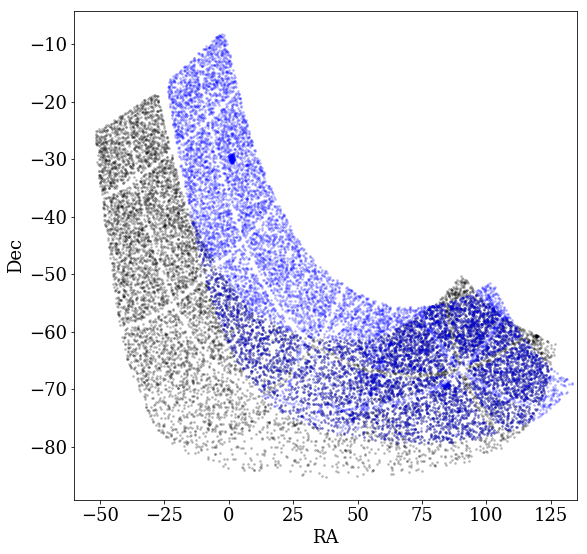

In [13]:
plt.figure(figsize=(9,9))
plt.scatter(df1['ra'][ok1], df1['dec'][ok1],
            alpha=0.2, s=3, label='Sector 001', c='k')

plt.scatter(df2['ra'][ok2], df2['dec'][ok2],
            alpha=0.2, s=3, label='Sector 002', c='b')

plt.scatter(df1['ra'][ok1]-360, df1['dec'][ok1],
            alpha=0.2, s=3, label='Sector 001', c='k')

plt.scatter(df2['ra'][ok2]-360, df2['dec'][ok2],
            alpha=0.2, s=3, label='Sector 002', c='b')

plt.xlim(-60,135)
# plt.ylim(-90,0)
plt.xlabel('RA')
plt.ylabel('Dec')

In [14]:

huh = np.where((df2['ra'][ok2] > 0) & (df2['ra'][ok2] < 2.2) & (df2['dec'][ok2] > -31) & (df2['dec'][ok2] < 29))[0]

In [15]:
huh.shape

(267,)

In [16]:
print(np.nanmedian(df2['ra'][ok2[huh]]), np.nanmedian(df2['dec'][ok2[huh]]))

1.068956939373343 -29.295487360360433


155.49126026307098
156.31735951851192


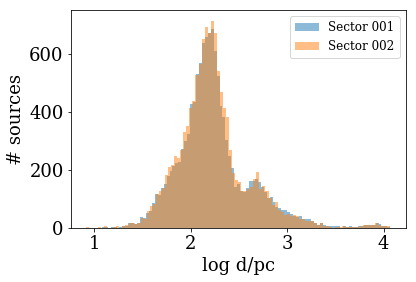

In [17]:
_ = plt.hist(np.log10(df1[u'r_est'].values[ok1]), bins=100, alpha=0.5, label='Sector 001')
_ = plt.hist(np.log10(df2[u'r_est'].values[ok2]), bins=100, alpha=0.5, label='Sector 002')

plt.legend(fontsize=12)
plt.xlabel('log d/pc')
plt.ylabel('# sources')

print(10.**np.nanmedian(np.log10(df1[u'r_est'].values[ok1])))
print(10.**np.nanmedian(np.log10(df2[u'r_est'].values[ok2])))

In [18]:
print(df1.shape, df2.shape)

(14802, 111) (14882, 111)


In [19]:
df_new = pd.concat([df1, df2], ignore_index=True, sort=False)
df_new.shape

(29684, 112)